# 대상 데이터프레임과 타겟컬럼을 지정하면 1일, 7일, 30일, 90일, 180일, 365일 단위로 return 뱉는 function

## EX : 1day return = nextday close / base day close

In [59]:
import pandas as pd
%matplotlib inline

In [6]:
df = pd.read_csv('semiconductor_bloomberg_raw_20200109.csv', index_col = 0)

In [7]:
df.head()

,date,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,...,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex
0,1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1981-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.set_index('date', inplace = True)

In [14]:
# df should involve datetime index
# target column example = 'SKhynix_close'
def make_return_columns(df, target_column):
    # lagging day list
    lag_days = [1, 7, 30, 90, 180, 365]
    
    col_name =  []
    # creating new column name
    for i in lag_days:
        col_name.append(target_column + str(i))
    # appending lagged columns
    for i, j in enumerate(lag_days):
        df[locals()['col_name'][i]] = df[target_column]/df[target_column].shift(periods = j, axis = 0)
    return df

In [34]:
df['USGG10YRIndex']

date
1981-01-01        NaN
1981-01-02    12.4220
1981-01-05    12.1520
1981-01-06    12.1120
1981-01-07    12.3820
               ...   
2019-10-27        NaN
2019-10-28     1.8420
2019-10-29     1.8385
2019-10-30     1.7715
2019-10-31     1.6910
Name: USGG10YRIndex, Length: 11682, dtype: float64

In [42]:
new_df = df[['USGG10YRIndex', 'GPGSTOC%Index']]

In [43]:
new_df

,USGG10YRIndex,GPGSTOC%Index
date,,
1981-01-01,NaN,NaN
1981-01-02,12.4220,NaN
1981-01-05,12.1520,NaN
1981-01-06,12.1120,NaN
1981-01-07,12.3820,NaN
...,...,...
2019-10-27,NaN,NaN
2019-10-28,1.8420,NaN
2019-10-29,1.8385,NaN


In [44]:
make_return_columns(new_df, 'USGG10YRIndex')

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,USGG10YRIndex,GPGSTOC%Index,USGG10YRIndex1,USGG10YRIndex7,USGG10YRIndex30,USGG10YRIndex90,USGG10YRIndex180,USGG10YRIndex365
date,,,,,,,,
1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,12.4220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,12.1520,NaN,0.978264,NaN,NaN,NaN,NaN,NaN
1981-01-06,12.1120,NaN,0.996708,NaN,NaN,NaN,NaN,NaN
1981-01-07,12.3820,NaN,1.022292,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-28,1.8420,NaN,NaN,NaN,1.066775,0.876058,0.744513,0.638696
2019-10-29,1.8385,NaN,0.998100,1.021786,1.117222,0.898978,0.728378,0.643958


In [47]:
new_df.head(50)

,USGG10YRIndex,GPGSTOC%Index,USGG10YRIndex1,USGG10YRIndex7,USGG10YRIndex30,USGG10YRIndex90,USGG10YRIndex180,USGG10YRIndex365
date,,,,,,,,
1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,12.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,12.152,NaN,0.978264,NaN,NaN,NaN,NaN,NaN
1981-01-06,12.112,NaN,0.996708,NaN,NaN,NaN,NaN,NaN
1981-01-07,12.382,NaN,1.022292,NaN,NaN,NaN,NaN,NaN
1981-01-08,12.352,NaN,0.997577,NaN,NaN,NaN,NaN,NaN
1981-01-09,12.572,NaN,1.017811,NaN,NaN,NaN,NaN,NaN
1981-01-12,12.452,NaN,0.990455,NaN,NaN,NaN,NaN,NaN
1981-01-13,12.532,NaN,1.006425,1.008855,NaN,NaN,NaN,NaN


In [48]:
new_df

,USGG10YRIndex,GPGSTOC%Index,USGG10YRIndex1,USGG10YRIndex7,USGG10YRIndex30,USGG10YRIndex90,USGG10YRIndex180,USGG10YRIndex365
date,,,,,,,,
1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,12.4220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,12.1520,NaN,0.978264,NaN,NaN,NaN,NaN,NaN
1981-01-06,12.1120,NaN,0.996708,NaN,NaN,NaN,NaN,NaN
1981-01-07,12.3820,NaN,1.022292,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-28,1.8420,NaN,NaN,NaN,1.066775,0.876058,0.744513,0.638696
2019-10-29,1.8385,NaN,0.998100,1.021786,1.117222,0.898978,0.728378,0.643958


In [49]:
ticker = pd.read_csv('semi_target_ticker.csv')

In [50]:
ticker

,category1,category2,ticker,name,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,economic,usa,GDP CQOQ Index,GDP US Chained 2012 Dollars QoQ SAAR,NaN,NaN,NaN,""""
1,economic,usa,GDP CYOY Index,GDP US Chained 2012 Dollars YoY SA,NaN,NaN,NaN,NaN
2,economic,usa,GDPCTOT% Index,GDP US Personal Consumption Chained 2012 Dlrs ...,NaN,NaN,NaN,NaN
3,economic,usa,GPDITOC% Index,US Gross Private Domestic Investment Total Cha...,NaN,NaN,NaN,NaN
4,economic,usa,GPGSTOC% Index,US GDP Govt Purchases & Investment Total Chain...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
287,economic,korea,KOCICOBA Index,South Korea KFB COFIX rate by Outstanding Balance,NaN,NaN,NaN,NaN
288,economic,korea,KOCICONF Index,South Korea KFB COFIX rate by Monthly Acquired...,NaN,NaN,NaN,NaN
289,economic,korea,KRBO3M Index,Korea Federation of Banks KORIBOR 3 Month,NaN,NaN,NaN,NaN
290,economic,korea,KWCDC Curncy,KRW 3 Month Certificate of Deposit,NaN,NaN,NaN,NaN


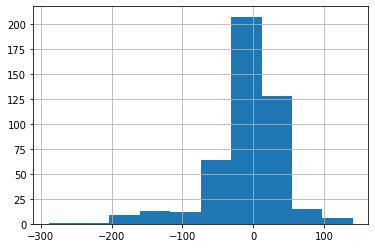

In [68]:
df['USMMMNCHIndex'].hist() # 미국 